In [126]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

In [127]:
data = pd.read_csv('study1_all_metabolic.csv')

In [128]:
data

,Number\n,Resting metabolic rate (kcal/day),RQ,% Fat,% Carbohydrate,Absolute\nVO2 max\n(L/min),Relative\nVO2 max\n(mL/kg/min),VO2 max/\nSMM\n(mL/kg/min),Max Aerobic\nPower \n(Watts),MAP/BW (W/kg),...,VT1 RER,VT2 FATox,VT2 CHOox,VT2 RER,VO2MAX \nFATox,VO2MAX\nCHOox,VO2MAX\nRER,PFO \n(g/min),PCHOox \n(g/min),PEAK\nRER
0,1,2211,0.92,24.7,75.3,3.65,48.00,108.07,280.0,3.68,...,NaN,0.00,3.94,1.02,0.00,3.06,1.16,0.95,5.59,1.19
1,5,1558,0.84,53.4,46.6,2.89,42.00,96.00,210.0,3.05,...,NaN,0.00,2.82,1.10,0.00,1.39,1.27,0.48,3.41,1.30
2,7,2617,0.86,44.9,55.1,4.13,51.00,114.43,NaN,0.00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,8,2287,0.80,65.5,34.5,3.03,39.00,90.04,230.0,2.96,...,NaN,0.00,2.94,1.06,0.00,2.68,1.14,0.54,4.75,1.18
4,9,2016,0.74,86.8,13.2,2.76,38.00,89.12,210.0,2.89,...,NaN,0.00,1.57,1.19,0.00,0.58,1.35,0.36,2.63,1.45
5,10,2339,0.82,58.6,41.4,3.02,39.00,106.43,215.0,2.77,...,0.93,0.07,3.37,0.98,0.00,2.74,1.14,0.58,4.00,1.25
6,15,2843,0.90,31.4,68.6,5.17,59.00,149.81,420.0,4.79,...,0.81,0.90,7.90,0.88,0.00,6.00,1.06,2.18,11.72,1.09
7,1001,1126,0.89,35.8,64.2,3.58,55.08,124.74,290.0,4.46,...,0.79,0.05,3.48,0.99,0.05,2.02,1.24,0.91,4.86,1.30
8,1015,1647,0.85,49.3,50.7,3.10,44.93,113.55,250.0,3.62,...,0.90,0.00,2.03,1.20,0.00,2.75,1.14,0.41,3.95,1.54
9,1018,2467,0.82,59.7,40.3,3.60,42.40,101.41,240.0,2.83,...,0.72,0.00,3.58,1.06,0.00,2.78,1.17,0.92,4.91,1.34


In [129]:
data_copy = data.copy()

In [130]:
data_copy.columns


Index(['Number\n', 'Resting metabolic rate (kcal/day)', 'RQ', '%  Fat',
       '% Carbohydrate', 'Absolute\nVO2 max\n(L/min)',
       'Relative\nVO2 max\n(mL/kg/min)', 'VO2 max/\nSMM\n(mL/kg/min)',
       'Max Aerobic\nPower \n(Watts)', 'MAP/BW (W/kg)', 'MAP/SMM (W/kg)',
       'Normative Percentiles\n(Kaminsky et al., 2017)',
       'Ventilatory threshold 1\n(mL/kg/min)', 'VT1/SMM\n(mL/kg/min)',
       'VT 1 \n%Normal', 'VT 1 \n%VO2max',
       'Ventilatory threshold 2\n(mL/kg/min)', 'VT2/SMM\n(mL/kg/min)',
       'VT2\n%Normal', 'VT2\n%VO2max', 'Functional Threshold Power\n(Watts)',
       'FTP/BW\n(W/kg)', 'FTP/SMM\n(W/kg)', 'RMR FATox\n(g/min)', 'RMR CHOox',
       'VT1 FATox', 'VT1 CHOox', 'VT1 RER', 'VT2 FATox', 'VT2 CHOox',
       'VT2 RER', 'VO2MAX \nFATox', 'VO2MAX\nCHOox', 'VO2MAX\nRER',
       'PFO \n(g/min)', 'PCHOox \n(g/min)', 'PEAK\nRER'],
      dtype='object')

In [131]:
data_copy = data_copy[['Absolute\nVO2 max\n(L/min)',
       'Relative\nVO2 max\n(mL/kg/min)', 'VO2 max/\nSMM\n(mL/kg/min)',
       'Max Aerobic\nPower \n(Watts)', 'MAP/BW (W/kg)', 'MAP/SMM (W/kg)',
       'Normative Percentiles\n(Kaminsky et al., 2017)','Ventilatory threshold 1\n(mL/kg/min)', 'VT1/SMM\n(mL/kg/min)',
       'VT 1 \n%Normal', 'VT 1 \n%VO2max',
       'Ventilatory threshold 2\n(mL/kg/min)', 'VT2/SMM\n(mL/kg/min)',
       'VT2\n%Normal', 'VT2\n%VO2max', 'Functional Threshold Power\n(Watts)',
       'FTP/BW\n(W/kg)', 'FTP/SMM\n(W/kg)']]

In [132]:
from sklearn import preprocessing
data_scaled = preprocessing.scale(data_copy.dropna())
data_scaled = pd.DataFrame(data_scaled[:,:], columns=data_copy.columns)
data_scaled

,Absolute\nVO2 max\n(L/min),Relative\nVO2 max\n(mL/kg/min),VO2 max/\nSMM\n(mL/kg/min),Max Aerobic\nPower \n(Watts),MAP/BW (W/kg),MAP/SMM (W/kg),"Normative Percentiles\n(Kaminsky et al., 2017)",Ventilatory threshold 1\n(mL/kg/min),VT1/SMM\n(mL/kg/min),VT 1 \n%Normal,VT 1 \n%VO2max,Ventilatory threshold 2\n(mL/kg/min),VT2/SMM\n(mL/kg/min),VT2\n%Normal,VT2\n%VO2max,Functional Threshold Power\n(Watts),FTP/BW\n(W/kg),FTP/SMM\n(W/kg)
0,-0.468816,-0.528765,0.011681,-0.658996,-0.716023,-0.281753,-0.687576,0.536953,0.892759,0.486683,1.584115,-0.545264,-0.119931,-0.225482,-0.137550,-0.691648,-0.741212,-0.383999
1,2.699039,2.238322,2.791746,3.412336,2.665494,3.269110,1.912321,3.447393,3.654381,2.717314,3.217733,2.559534,2.941246,1.688452,0.997237,3.026447,2.386341,2.770123
2,0.356300,1.695973,1.185102,0.830516,2.113068,1.671221,1.439612,1.392964,1.035855,0.653980,0.903440,0.583753,0.108570,-0.108302,-1.272337,1.113670,2.350185,1.882531
3,-0.350942,0.291676,0.467976,0.036109,0.706892,0.945610,0.257841,-0.319059,-0.276564,-0.572866,-0.866313,1.007135,1.200228,0.086997,1.501587,-0.175843,0.361567,0.495668
4,0.385768,-0.058360,-0.310032,-0.162492,-0.615582,-0.907014,-0.214868,0.023346,-0.083664,-0.126740,0.222766,0.301499,0.118372,0.008877,0.871150,0.468914,0.072313,-0.106626
5,0.857263,-0.685106,0.054619,0.433313,-0.983866,-0.428419,-0.923930,-0.832666,-0.555742,-0.517101,-1.002448,-0.827518,-0.278595,-0.264542,-0.767987,0.039076,-1.120857,-0.693071
6,0.709921,1.296129,0.434010,0.631914,1.058436,0.266315,1.203258,0.194548,-0.201508,-0.238272,-0.594043,0.866008,0.136750,0.008877,-0.389725,0.253995,0.578507,-0.098701
7,0.533110,0.228033,-0.383091,0.234711,-0.113377,-0.683155,0.257841,-0.147857,-0.404930,-0.238272,-0.457908,0.442626,-0.053770,0.165117,0.492887,-0.175843,-0.488115,-0.938744
8,0.150021,-0.127538,-0.343998,0.234711,-0.046416,-0.243157,-0.214868,-0.661464,-0.740225,-0.684398,-0.866313,0.019245,-0.140147,-0.264542,0.366800,0.253995,0.018078,-0.138326
9,-0.247803,0.331799,-0.170324,0.036109,0.623191,0.181403,0.257841,0.365750,0.117653,0.040557,0.495036,0.866008,0.451015,0.126057,1.249412,0.039076,0.542350,0.162821


In [133]:
wcss =[]

for i in range(1,12):
    kmeans = KMeans(i)
    kmeans.fit(data_scaled)
    wcss.append(kmeans.inertia_)
    
wcss

[396.0,
 204.35234531129714,
 135.14757460277903,
 105.26775753285021,
 85.62922898411944,
 72.08104431439631,
 59.11385491486352,
 50.444861760531836,
 41.72417491002325,
 35.477263952037156,
 28.820685673025938]

Text(0, 0.5, 'WCSS')

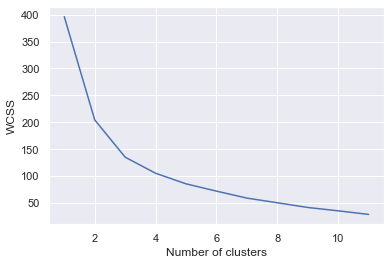

In [134]:
plt.plot(range(1,12),wcss)
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')

In [138]:
clustering_kmeans = KMeans(n_clusters=3, precompute_distances="auto")
data_scaled['clusters'] = clustering_kmeans.fit_predict(data_scaled)
data_scaled['clusters']

C:\Users\filip\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:932: FutureWarning: 'precompute_distances' was deprecated in version 0.23 and will be removed in 0.25. It has no effect
  warnings.warn("'precompute_distances' was deprecated in version "


0     0
1     2
2     2
3     1
4     1
5     0
6     1
7     1
8     1
9     1
10    0
11    2
12    1
13    0
14    0
15    0
16    1
17    0
18    1
19    1
20    0
21    0
Name: clusters, dtype: int32

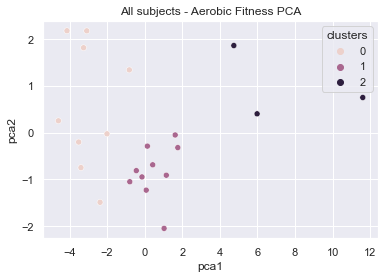

In [141]:
pca_num_components = 2

reduced_data = PCA(n_components=pca_num_components).fit_transform(data_scaled)
results = pd.DataFrame(reduced_data,columns=['pca1','pca2'])

sns.scatterplot(x="pca1", y="pca2", hue=data_scaled['clusters'], data=results)
plt.title('All subjects - Aerobic Fitness PCA')
plt.show()